In [5]:
import numpy as np
import random
from grid_world import GridWorld
from draw import draw
from tqdm import tqdm
from experience_replay_buffer import ExperienceReplayBuffer

rows = 5
cols = 5
env = GridWorld(
    forbidden_score=-10,
    terminal_score=1,
    desc=[".....", ".##..", "..#..", ".#T#.", ".#..."],
)
env.render_grid()


⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [6]:
state_values = np.array([random.random() for i in range(25)])
learning_rate = 0.01
gamma = 0.99

  0%|          | 0/5000 [00:00<?, ?it/s]

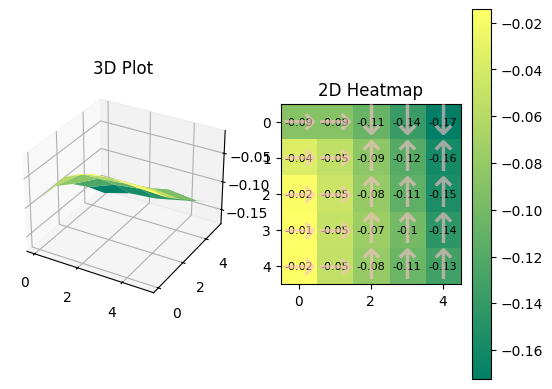

  2%|▏         | 89/5000 [00:00<00:31, 153.56it/s]

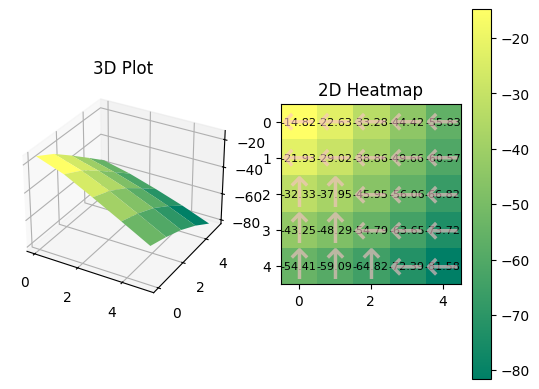

  4%|▎         | 187/5000 [00:01<00:32, 146.22it/s]

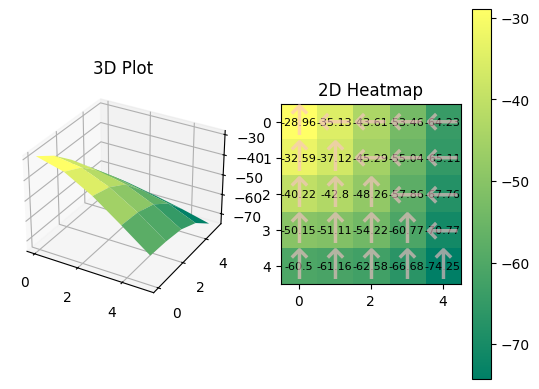

  6%|▌         | 288/5000 [00:02<00:32, 147.01it/s]

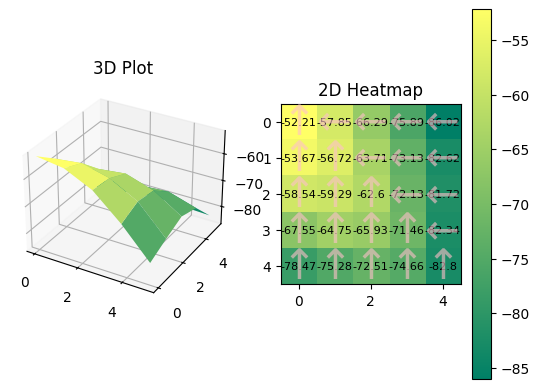

  8%|▊         | 389/5000 [00:03<00:30, 152.00it/s]

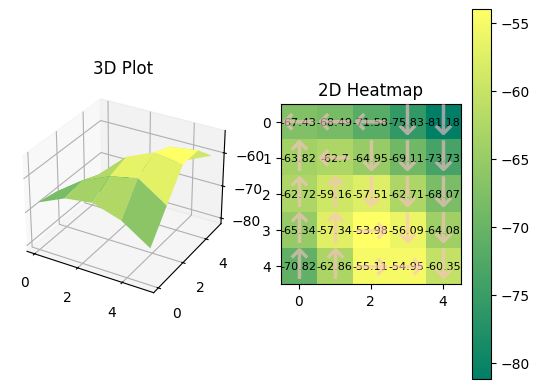

 10%|▉         | 497/5000 [00:04<00:39, 115.28it/s]

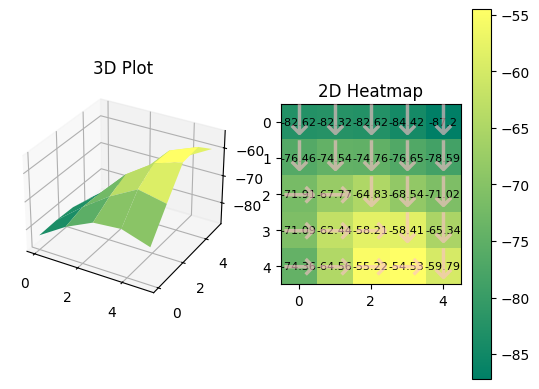

 12%|█▏        | 591/5000 [00:04<00:31, 141.99it/s]

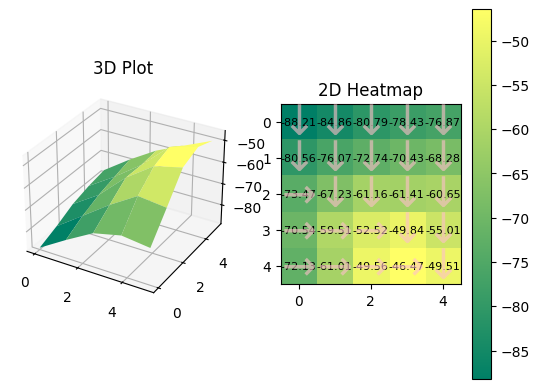

 14%|█▍        | 688/5000 [00:05<00:29, 145.63it/s]

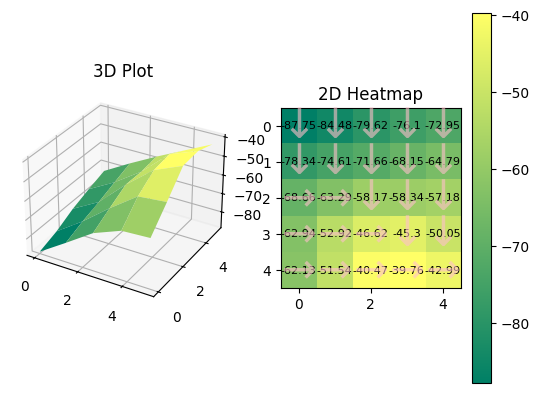

 16%|█▌        | 790/5000 [00:06<00:27, 152.14it/s]

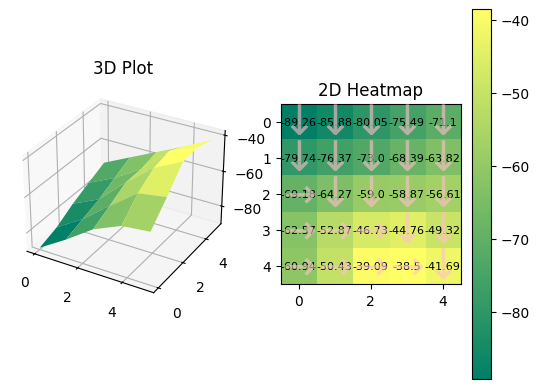

 18%|█▊        | 893/5000 [00:07<00:31, 131.46it/s]

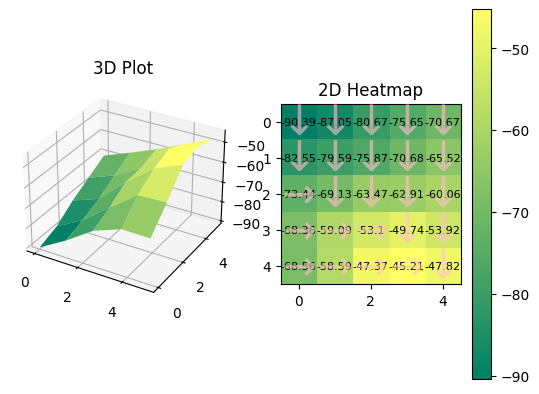

 20%|█▉        | 995/5000 [00:08<00:26, 152.02it/s]

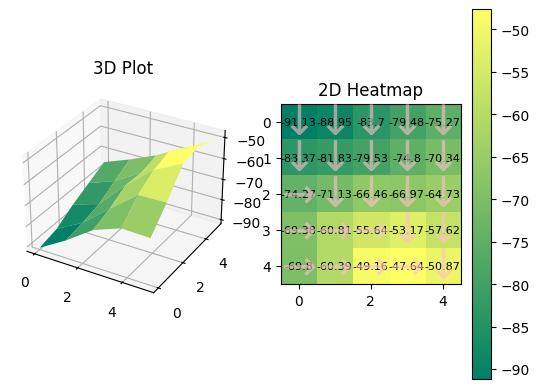

 22%|██▏       | 1099/5000 [00:08<00:24, 158.49it/s]

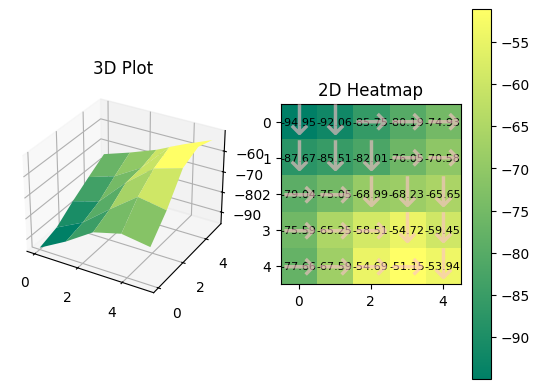

 24%|██▍       | 1196/5000 [00:09<00:26, 145.58it/s]

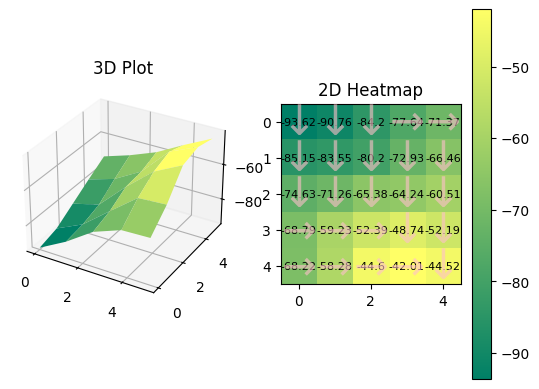

 26%|██▌       | 1296/5000 [00:10<00:24, 149.98it/s]

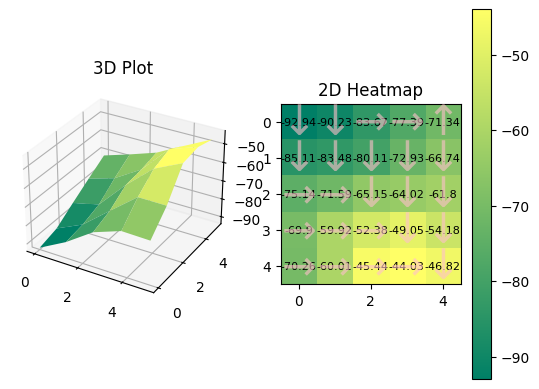

 28%|██▊       | 1399/5000 [00:11<00:23, 152.46it/s]

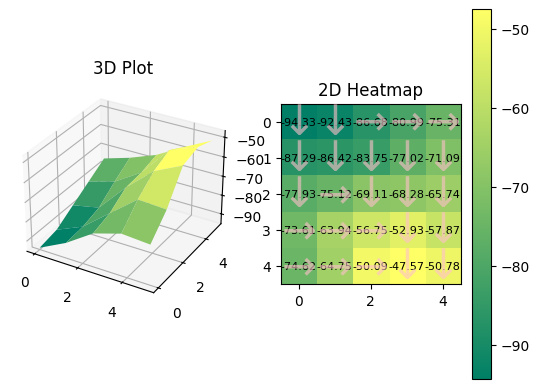

 30%|██▉       | 1497/5000 [00:12<00:23, 151.17it/s]

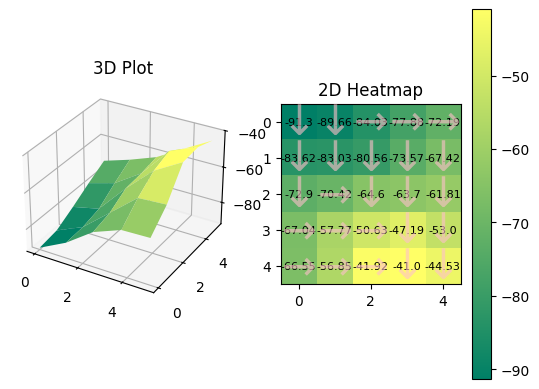

 32%|███▏      | 1584/5000 [00:12<00:22, 150.77it/s]

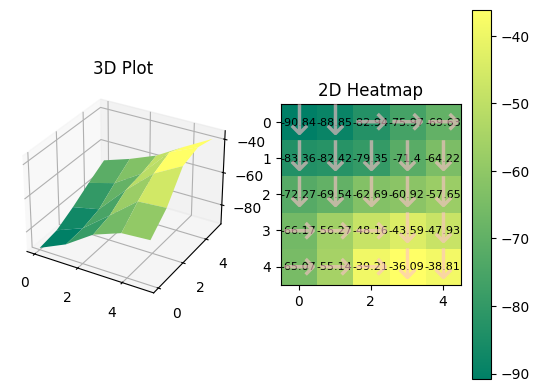

 34%|███▍      | 1700/5000 [00:13<00:20, 158.13it/s]

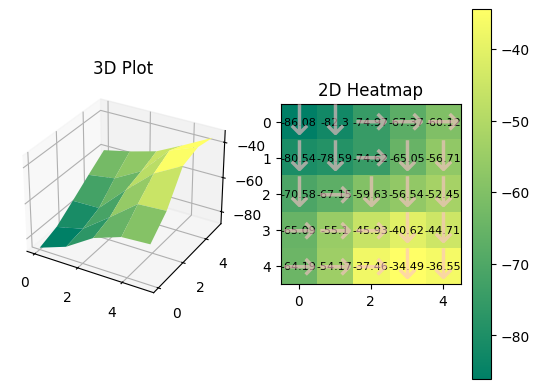

 36%|███▌      | 1785/5000 [00:14<00:21, 148.08it/s]

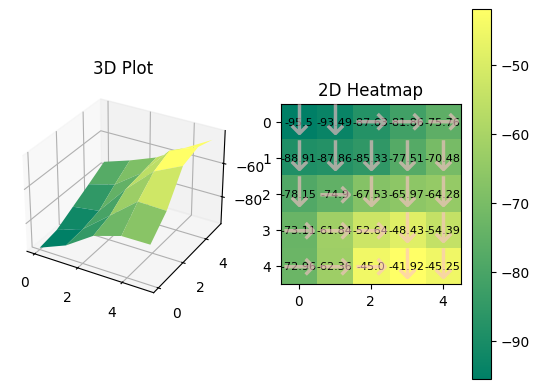

 38%|███▊      | 1888/5000 [00:14<00:20, 155.30it/s]

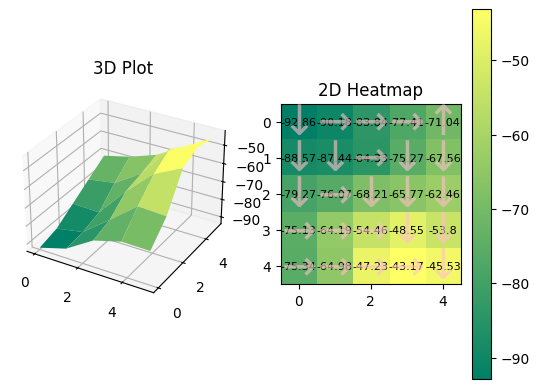

 40%|███▉      | 1991/5000 [00:15<00:19, 152.95it/s]

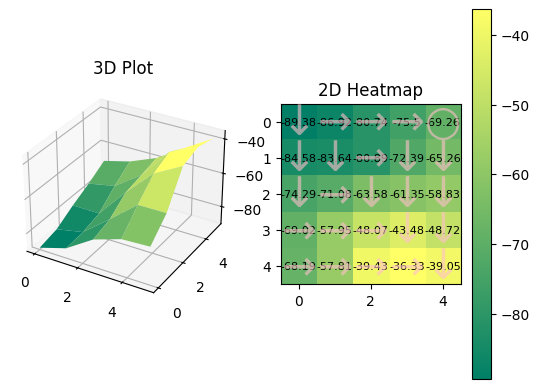

 42%|████▏     | 2093/5000 [00:16<00:21, 135.60it/s]

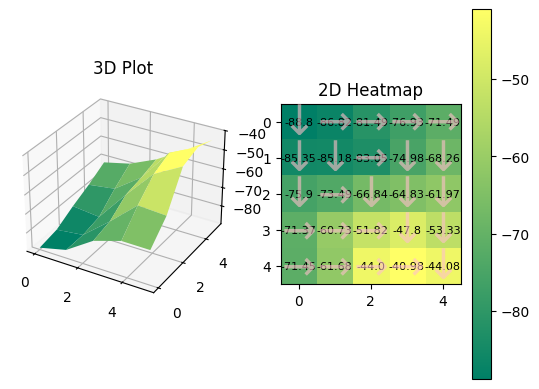

 44%|████▍     | 2194/5000 [00:17<00:18, 151.28it/s]

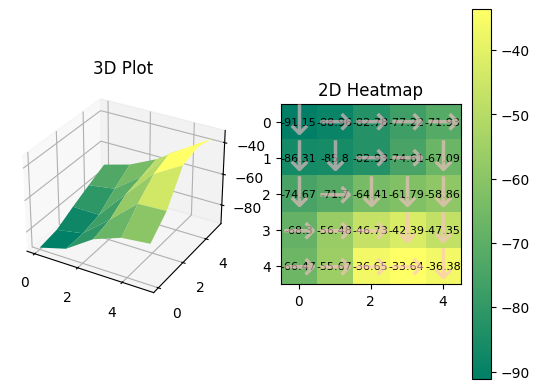

 46%|████▌     | 2295/5000 [00:18<00:17, 152.00it/s]

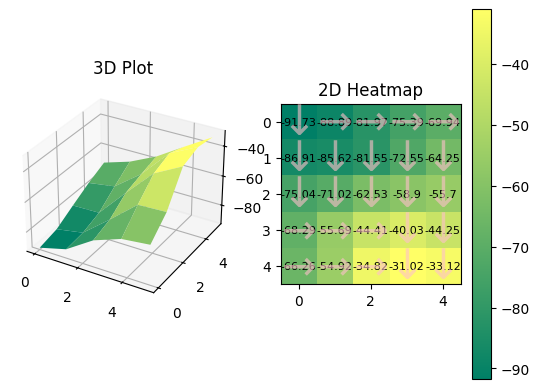

 48%|████▊     | 2392/5000 [00:18<00:16, 154.95it/s]

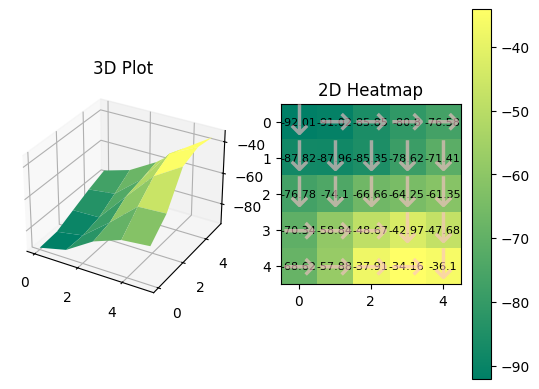

 50%|█████     | 2500/5000 [00:19<00:18, 136.06it/s]

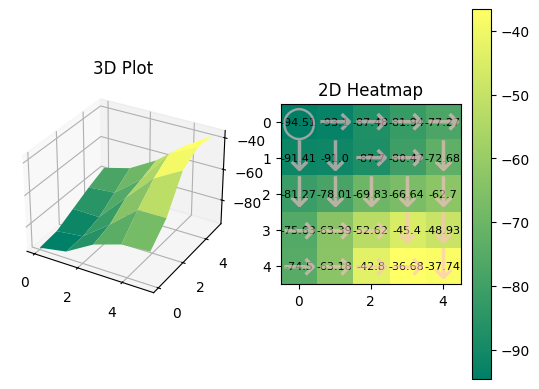

 52%|█████▏    | 2599/5000 [00:20<00:18, 133.10it/s]

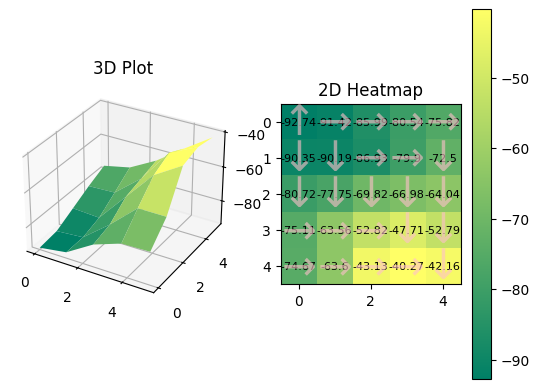

 54%|█████▍    | 2698/5000 [00:21<00:15, 147.46it/s]

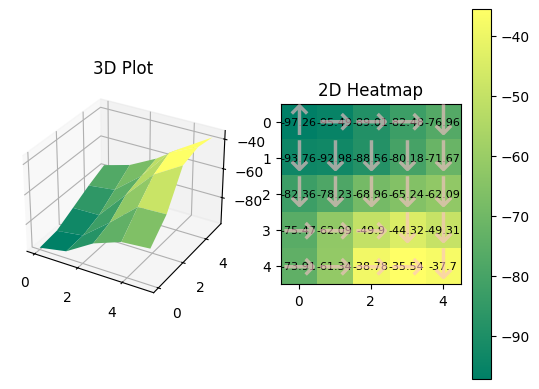

 56%|█████▌    | 2791/5000 [00:22<00:24, 91.97it/s] 

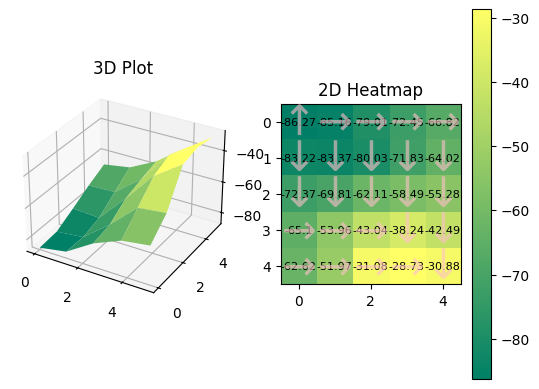

 58%|█████▊    | 2900/5000 [00:23<00:20, 103.76it/s]

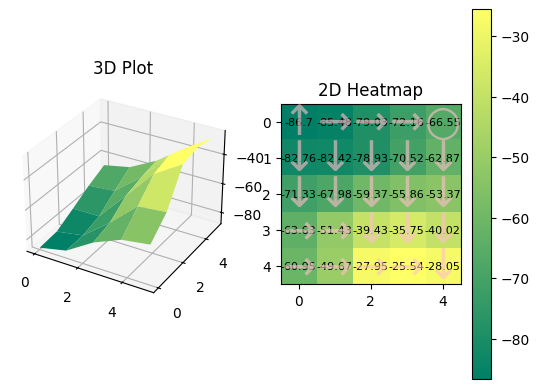

 60%|█████▉    | 2996/5000 [00:25<00:21, 94.48it/s] 

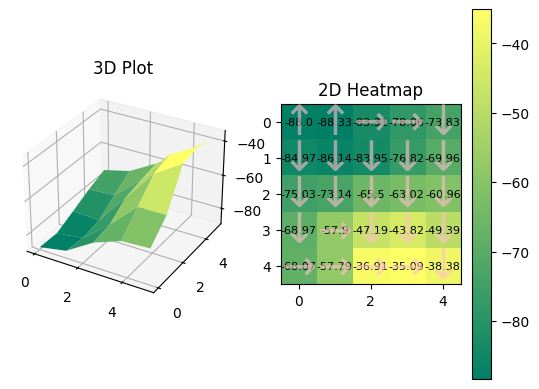

 62%|██████▏   | 3094/5000 [00:26<00:16, 116.55it/s]

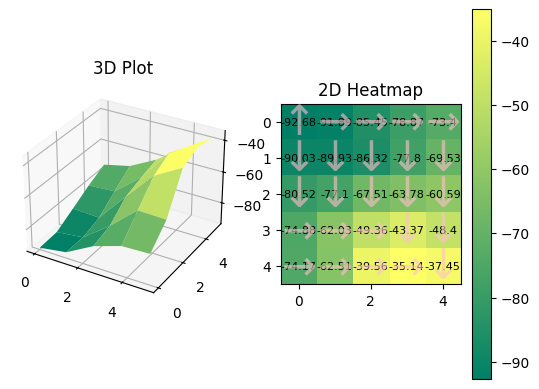

 64%|██████▍   | 3197/5000 [00:27<00:14, 122.05it/s]

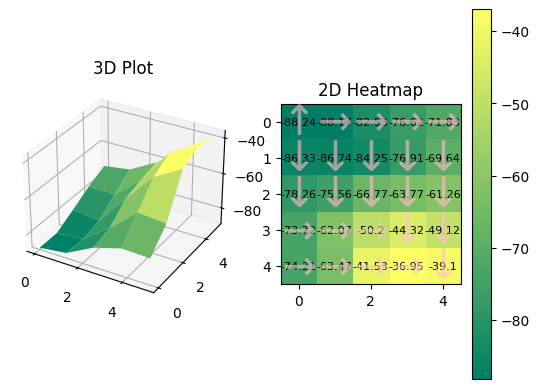

 66%|██████▌   | 3294/5000 [00:28<00:15, 107.89it/s]

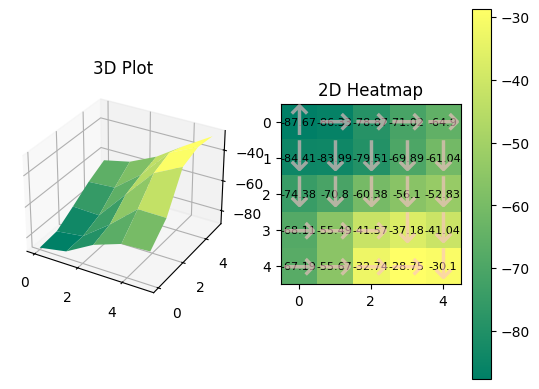

 68%|██████▊   | 3395/5000 [00:29<00:12, 131.63it/s]

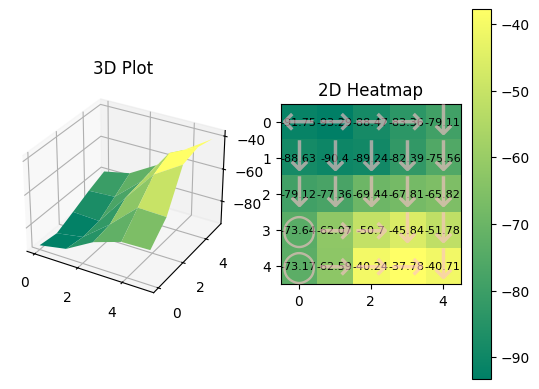

 70%|██████▉   | 3493/5000 [00:30<00:12, 119.20it/s]

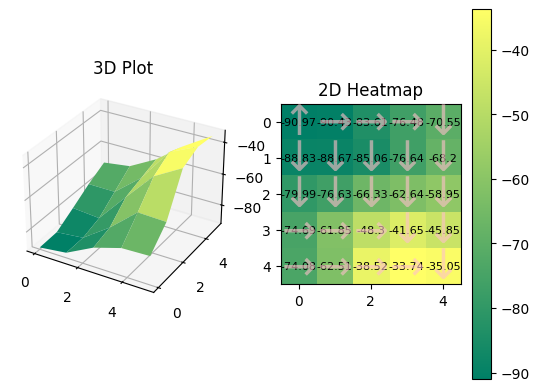

 72%|███████▏  | 3598/5000 [00:31<00:10, 128.75it/s]

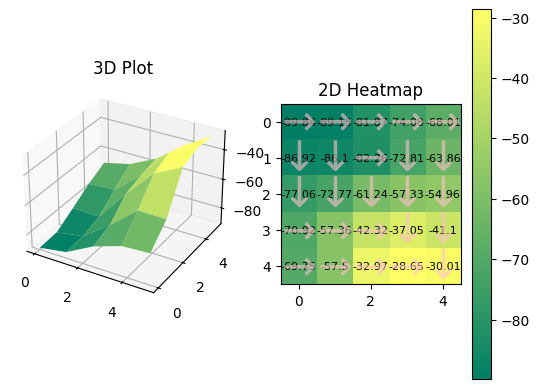

 74%|███████▍  | 3691/5000 [00:32<00:10, 124.29it/s]

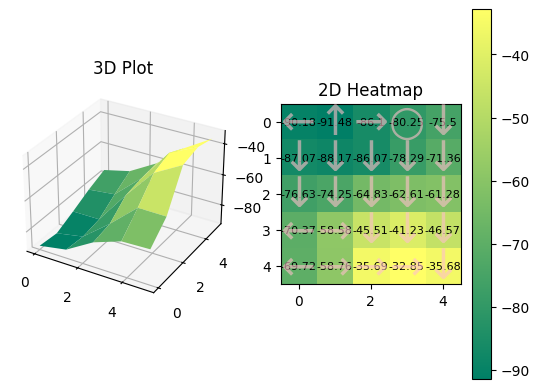

 76%|███████▌  | 3794/5000 [00:33<00:09, 120.89it/s]

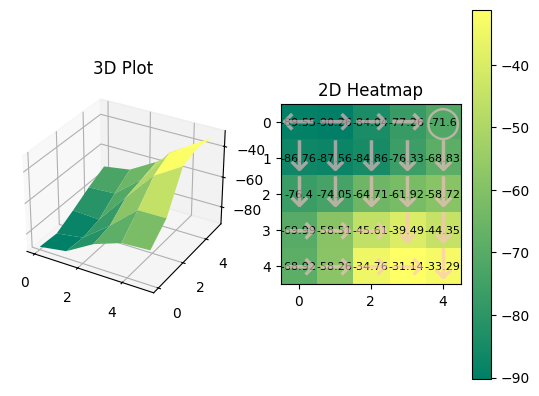

 78%|███████▊  | 3899/5000 [00:34<00:09, 110.84it/s]

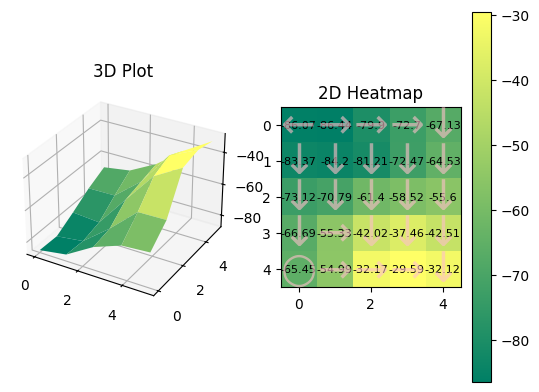

 80%|███████▉  | 3992/5000 [00:35<00:08, 122.77it/s]

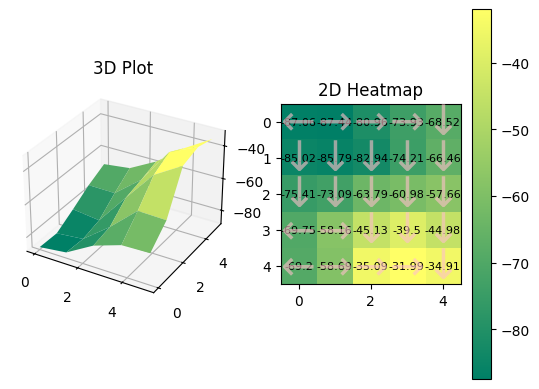

 82%|████████▏ | 4090/5000 [00:36<00:07, 126.08it/s]

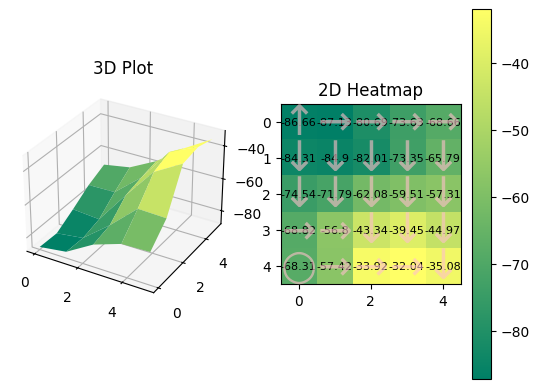

 84%|████████▍ | 4198/5000 [00:37<00:06, 131.90it/s]

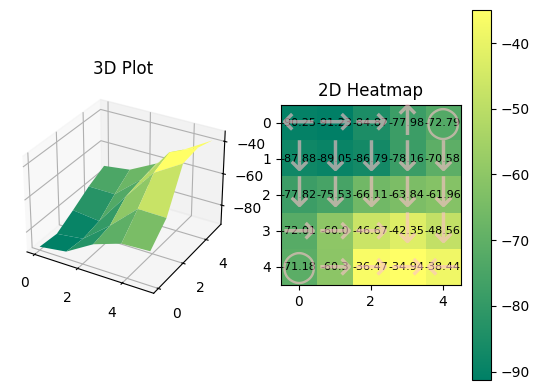

 86%|████████▌ | 4289/5000 [00:38<00:06, 117.18it/s]

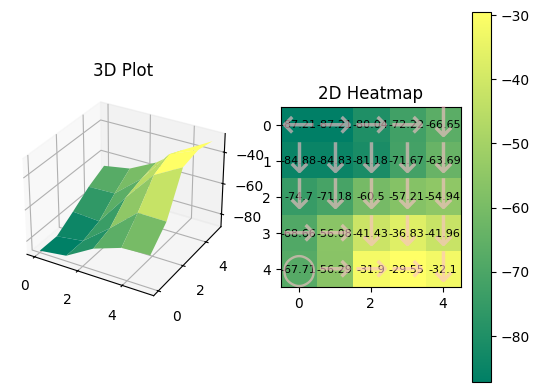

 88%|████████▊ | 4393/5000 [00:38<00:04, 136.81it/s]

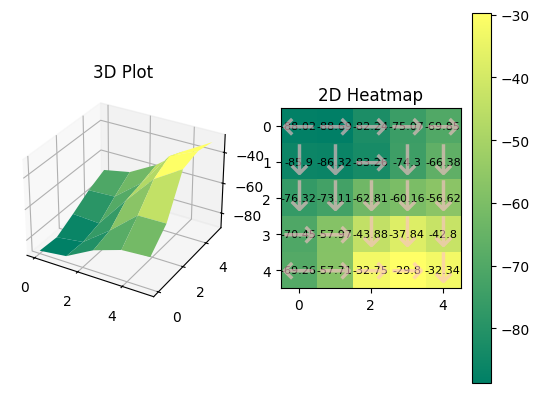

 90%|████████▉ | 4486/5000 [00:39<00:03, 135.69it/s]

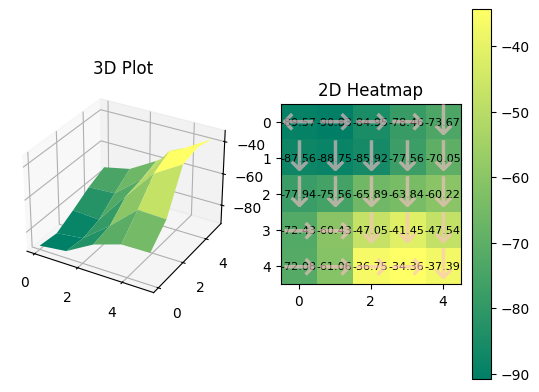

 92%|█████████▏| 4597/5000 [00:40<00:03, 109.20it/s]

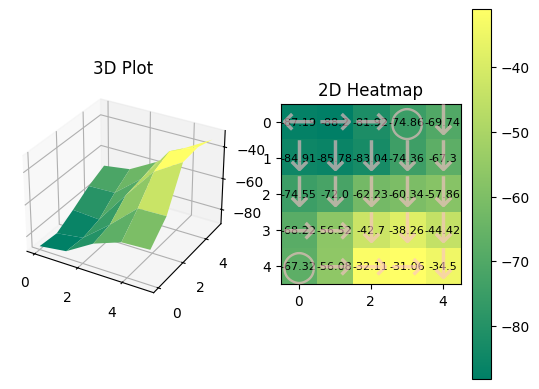

 94%|█████████▍| 4692/5000 [00:42<00:03, 100.66it/s]

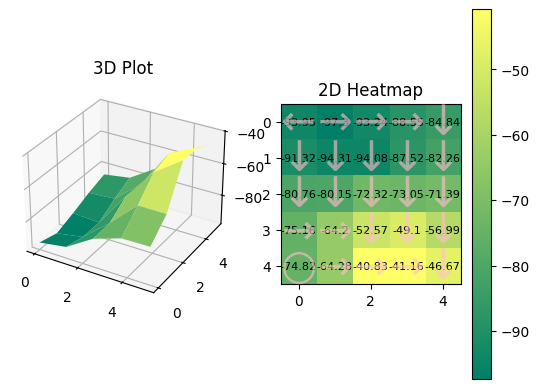

 96%|█████████▌| 4795/5000 [00:43<00:01, 113.04it/s]

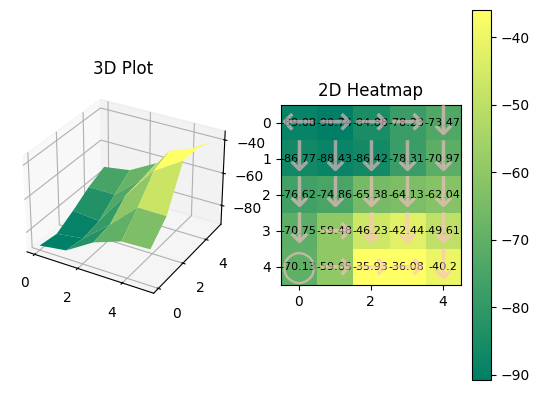

 98%|█████████▊| 4900/5000 [00:44<00:00, 127.72it/s]

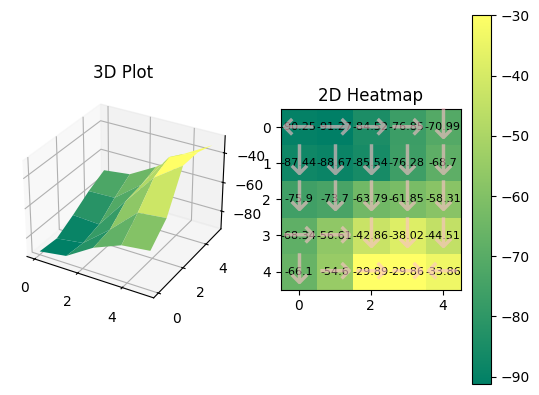

100%|██████████| 5000/5000 [00:45<00:00, 109.85it/s]


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.fc1 = nn.Linear(2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


policy = 0.2 * np.ones((rows * cols, 5))
episodes = [
    env.get_traj(10, action=random.randint(0, 4), policy=policy) for i in range(500)
]
experience_pool = ExperienceReplayBuffer(max_size=10000)
for traj in episodes:
    for exp in traj:
        experience_pool.add_experience(exp)
lr = 0.001
network = model()
optimizer = optim.Adam(network.parameters(), lr=lr)
batch_size = 100

for _ in tqdm(range(5000)):
    optimizer.zero_grad()

    batch = experience_pool.sample_batch(batch_size=batch_size)
    tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = batch

    tmpstate = tmpstate.reshape(batch_size, 1)
    tmpstate = np.hstack((tmpstate // 5, tmpstate % 5))  # 将state变成了行列
    nextState = nextState.reshape(batch_size, 1)
    nextState = np.hstack((nextState // 5, nextState % 5))  # 将state变成了行列

    tmpstate = torch.tensor(tmpstate, dtype=torch.float32).view(batch_size, 2)
    nextState = torch.tensor(nextState, dtype=torch.float32).view(batch_size, 2)

    tmpscore = torch.tensor(tmpscore, dtype=torch.float32).view(batch_size, 1)
    terminal = torch.tensor(terminal, dtype=torch.float32).view(batch_size, 1)

    with torch.no_grad():
        # 以下一个state出发，计算下一个state的五个action values
        next_action_values = network(nextState)  # 网络

        b = [next_action_values[i, nextAction[i]] for i in range(batch_size)]
        next_action_value = torch.tensor(b, dtype=torch.float32).view(batch_size, 1)

        # c = next_action_values.max(1)[0] #改成DQN了，这里就得取最大值
        # next_action_value = torch.tensor(c,dtype = torch.float32).view(batch_size,1)

        target = tmpscore + (1.0 - terminal) * gamma * next_action_value

    # 获得当前的state的五个action values
    now_action_values = network(tmpstate)  # 网络

    now_action_value = now_action_values[0, tmpaction[0]]

    for i in range(1, batch_size):
        now_action_value = torch.cat(
            (now_action_value.view(-1), now_action_values[i, tmpaction[i]].view(-1)),
            dim=0,
        )

    now_action_value = now_action_value.view(-1, 1)

    loss = F.mse_loss(now_action_value, target)
    loss.backward()
    optimizer.step()

    if _ % 100 == 0:
        # s = np.array([[i] for i in range(25)])
        # s = np.hstack((s // 5, s % 5))
        # states = torch.tensor(s, dtype = torch.float32).view(25,2)
        # # 还原成state_values
        # state_values = network(states).view(-1).detach().numpy()

        s = np.array([[i] for i in range(25)])
        s = np.hstack((s // 5, s % 5))
        states = torch.tensor(s, dtype=torch.float32).view(25, 2)
        # 还原成action_values
        action_values = network(states).view(-1, 5).detach().numpy()

        state_values = np.sum(policy * action_values, axis=1)

        p = np.argmax(action_values, axis=1)
        draw(state_values.reshape(5, 5), p)